<a href="https://colab.research.google.com/github/vidyasagar2/MachineLearning/blob/master/IMDB_Movie_Classification_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow import keras
from tensorflow.keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
train_labels[0]

1

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
import numpy as np
mat = np.zeros((1,3))
mat[0,[0,1]] = 1
mat

array([[1., 1., 0.]])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Page No.70 - Deep Learning With Python By FC.
Without an activation function like relu(also called a non-linearity)  ,  the layers would consis of linear operations(a dot product and an addition).
So how many layers we add , it will still be a linear operations.By adding non-linearity , we get much richer hypothesis plane.

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.5348 - acc: 0.7942 - val_loss: 0.4215 - val_acc: 0.8576
Epoch 2/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.3319 - acc: 0.9011 - val_loss: 0.3220 - val_acc: 0.8847
Epoch 3/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.2413 - acc: 0.9263 - val_loss: 0.2938 - val_acc: 0.8846
Epoch 4/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1893 - acc: 0.9382 - val_loss: 0.2754 - val_acc: 0.8895
Epoch 5/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1552 - acc: 0.9509 - val_loss: 0.2756 - val_acc: 0.8892
Epoch 6/20
15000/15000 [==============================] - 3s 172us/step - loss: 0.1299 - acc: 0.9604 - val_loss: 0.2839 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 3s 175us/step - loss: 0.1107 - acc: 0.9665 - val_loss: 0.2987 - 

In [0]:
history_dict = history.history

In [0]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

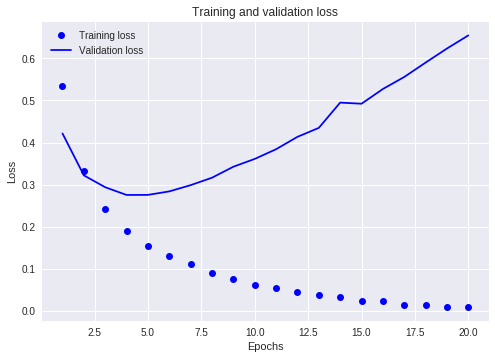

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()